In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob


In [2]:
path = "../data/api_data_aadhar_biometric/*.csv"
files = glob.glob(path)

print("Files found:", len(files))

df_list = [pd.read_csv(file) for file in files]
bio_df = pd.concat(df_list, ignore_index=True)

bio_df.head()


Files found: 4


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [6]:
bio_df.isnull().sum()





date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [7]:
bio_age_columns = [col for col in bio_df.columns if col.startswith("bio_age")]

bio_age_columns


['bio_age_5_17', 'bio_age_17_']

In [8]:
bio_df["total_biometric_updates"] = bio_df[bio_age_columns].sum(axis=1)

bio_df[bio_age_columns + ["total_biometric_updates"]].head()


,bio_age_5_17,bio_age_17_,total_biometric_updates
0,280,577,857
1,144,369,513
2,643,1091,1734
3,256,980,1236
4,271,815,1086


In [9]:
state_bio_updates = (
    bio_df
    .groupby("state")["total_biometric_updates"]
    .sum()
    .reset_index()
    .sort_values(by="total_biometric_updates", ascending=False)
)

state_bio_updates.head(10)


,state,total_biometric_updates
44,Uttar Pradesh,9577735
27,Maharashtra,9226139
26,Madhya Pradesh,5923771
5,Bihar,4897587
40,Tamil Nadu,4698117
38,Rajasthan,3994955
2,Andhra Pradesh,3714592
16,Gujarat,3196514
8,Chhattisgarh,2648729
22,Karnataka,2635954


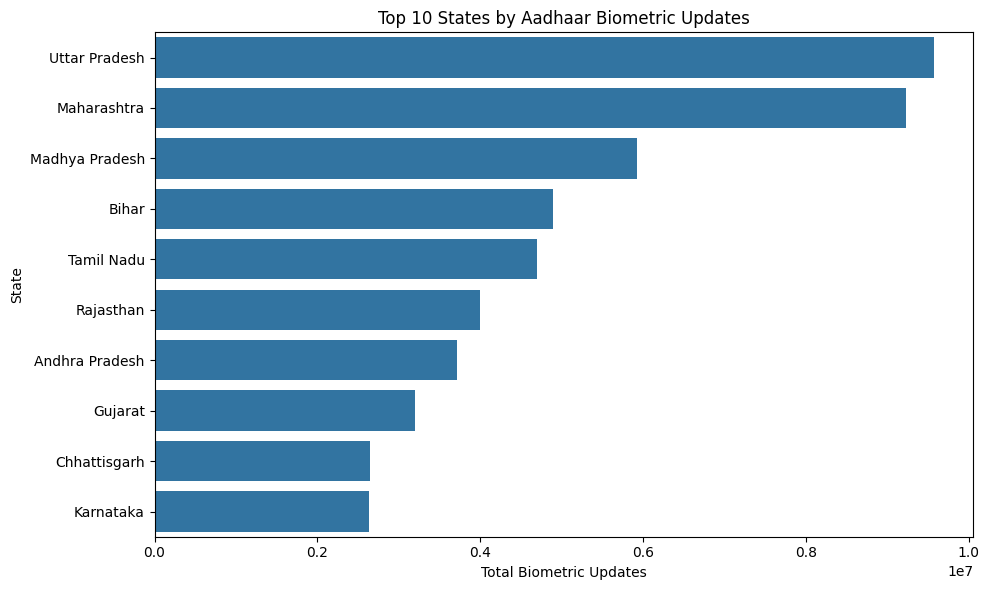

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=state_bio_updates.head(10),
    x="total_biometric_updates",
    y="state"
)

plt.title("Top 10 States by Aadhaar Biometric Updates")
plt.xlabel("Total Biometric Updates")
plt.ylabel("State")
plt.tight_layout()
plt.show()
